# Dataset (KaggleHub):




*   Dataset used: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment?resource=download
*  Github Repo : https://github.com/haiqalzmr/lab-exercise3?tab=readme-ov-file

* Colab Repo : https://colab.research.google.com/drive/1JAC5hVMDSgEjvaHvGsUOqagHiSsVfagP?usp=sharing






In [ ]:
!pip install kagglehub --quiet
import kagglehub

path = kagglehub.dataset_download("crowdflower/twitter-airline-sentiment")
print("Dataset saved at:", path)


Dataset saved at: /kaggle/input/twitter-airline-sentiment


In [ ]:
import pandas as pd
import os

# Load the dataset CSV
df = pd.read_csv(os.path.join(path, 'Tweets.csv'))

# View structure
df[['airline_sentiment', 'text']].head()


,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


# **ABSA (Aspect-Based Sentiment Analysis) using Dependency Parsing**

In [ ]:
!pip install spacy --quiet
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**Extract Aspects and Sentiments**



In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Sample 10 tweets
sample_tweets = df['text'].dropna().sample(10, random_state=42).tolist()

# ABSA function: Extract noun + adjective pairs
def extract_aspect_sentiment(text):
    doc = nlp(text)
    aspects = []
    for token in doc:
        if token.dep_ == 'amod' and token.head.pos_ == 'NOUN':
            aspects.append((token.head.text, token.text))  # (Aspect, Sentiment)
    return aspects

# Run ABSA
for i, tweet in enumerate(sample_tweets):
    print(f"\nTweet {i+1}: {tweet}")
    print("Extracted (Aspect, Sentiment) pairs:", extract_aspect_sentiment(tweet))



Tweet 1: @SouthwestAir you're my early frontrunner for best airline! #oscars2016
Extracted (Aspect, Sentiment) pairs: [('frontrunner', 'early'), ('airline', 'best')]

Tweet 2: @USAirways how is it that my flt to EWR was Cancelled Flightled yet flts to NYC from USAirways are still flying?
Extracted (Aspect, Sentiment) pairs: []

Tweet 3: @JetBlue what is going on with your BDL to DCA flights yesterday and today?! Why is every single one getting delayed?
Extracted (Aspect, Sentiment) pairs: []

Tweet 4: @JetBlue do they have to depart from Washington, D.C.??
Extracted (Aspect, Sentiment) pairs: []

Tweet 5: @JetBlue I can probably find some of them. Are the ticket #s on there?
Extracted (Aspect, Sentiment) pairs: []

Tweet 6: @united still waiting to hear back. My wallet was stolen from one of your planes so would appreciate a resolution here
Extracted (Aspect, Sentiment) pairs: []

Tweet 7: @united Yes my flight was rebooked. I'm just losing trust in you if I want to get anywhere on ti

# Bar Chart of Most Frequent Aspects

<ipython-input-26-1170640353>:38: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


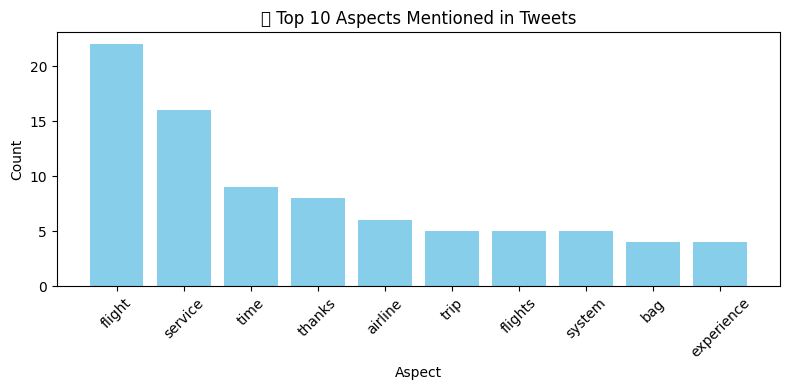

In [26]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from collections import Counter

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Sample tweet list
sample_texts = df['text'].dropna().sample(500, random_state=42).tolist()

# Extract (aspect, sentiment) pairs
def extract_aspect_sentiment(text):
    doc = nlp(text)
    pairs = []
    for token in doc:
        if token.dep_ == "amod" and token.head.pos_ == "NOUN":
            pairs.append((token.head.text.lower(), token.text.lower()))
    return pairs

# Collect all aspects
all_pairs = []
for text in sample_texts:
    all_pairs.extend(extract_aspect_sentiment(text))

# Count aspects
aspect_counts = Counter([a for a, s in all_pairs])
top_aspects = aspect_counts.most_common(10)

# Plot
aspects, counts = zip(*top_aspects)
plt.figure(figsize=(8, 4))
plt.bar(aspects, counts, color='skyblue')
plt.title("🔍 Top 10 Aspects Mentioned in Tweets")
plt.ylabel("Count")
plt.xlabel("Aspect")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Aspect-Sentiment Pair Heatmap

<ipython-input-27-2328885858>:15: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


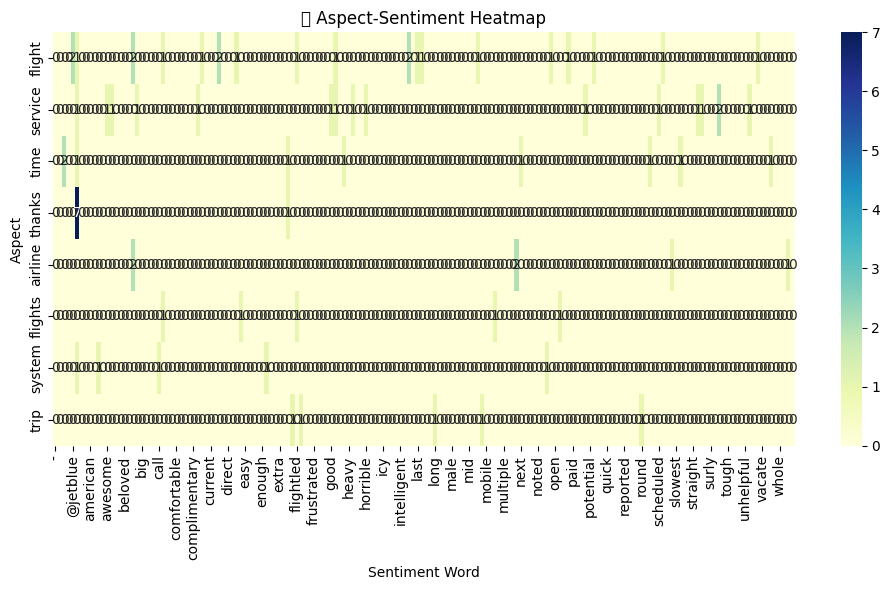

In [27]:
import seaborn as sns
import pandas as pd

# Build a DataFrame of (aspect, sentiment) pairs
df_pairs = pd.DataFrame(all_pairs, columns=["aspect", "sentiment"])
heatmap_data = pd.crosstab(df_pairs["aspect"], df_pairs["sentiment"])
top_heatmap = heatmap_data.loc[heatmap_data.sum(axis=1).nlargest(8).index]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(top_heatmap, annot=True, fmt="d", cmap="YlGnBu")
plt.title("🧠 Aspect-Sentiment Heatmap")
plt.xlabel("Sentiment Word")
plt.ylabel("Aspect")
plt.tight_layout()
plt.show()


# Word Cloud of Aspects

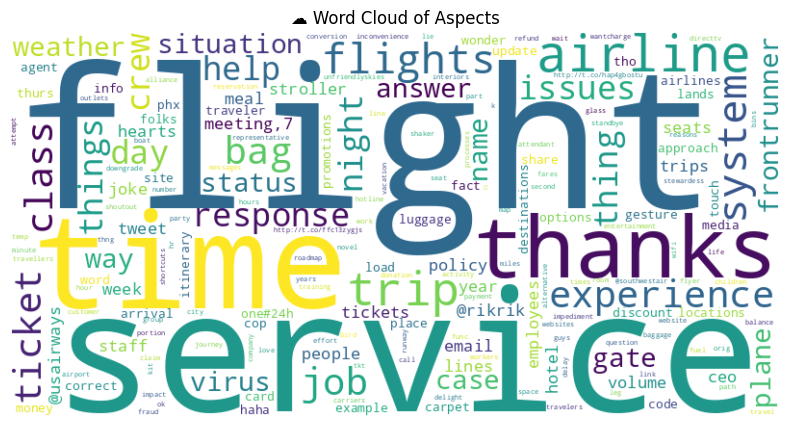

In [28]:
from wordcloud import WordCloud

aspect_freq = dict(aspect_counts)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(aspect_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("☁️ Word Cloud of Aspects")
plt.show()


# **Unsupervised Learning via Standard LDA**

In [ ]:
!pip install scikit-learn --quiet
!pip install pandas --quiet

**Train LDA Model**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# Sample tweets for training
sample_texts = df['text'].dropna().sample(1000, random_state=42).tolist()

# Vectorize
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(sample_texts)
vocab = vectorizer.get_feature_names_out()

# LDA model
lda_model = LatentDirichletAllocation(n_components=5, max_iter=10, learning_method='online', random_state=42)
lda_model.fit(X)


LatentDirichletAllocation(learning_method='online', n_components=5,
                          random_state=42)

**Display Topics**

In [ ]:
# Show top 8 words per topic
n_top_words = 8

for idx, topic in enumerate(lda_model.components_):
    top_words = [vocab[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    print(f"Topic {idx + 1}: {' | '.join(top_words)}")


Topic 1: flight | southwestair | americanair | jetblue | going | united | thanks | best
Topic 2: service | southwestair | united | customer | americanair | usairways | good | dm
Topic 3: jetblue | http | thank | southwestair | usairways | airline | business | fleet
Topic 4: usairways | jetblue | dfw | late | flightr | http | americanair | guys
Topic 5: united | flight | americanair | usairways | cancelled | help | thanks | just


# Top Words per Topic (Bar Chart)


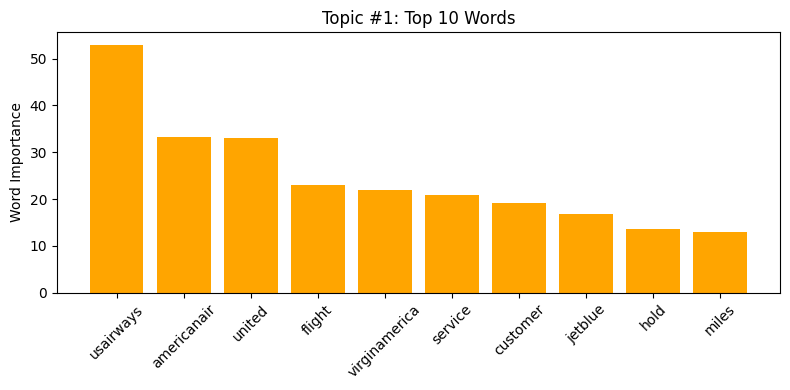

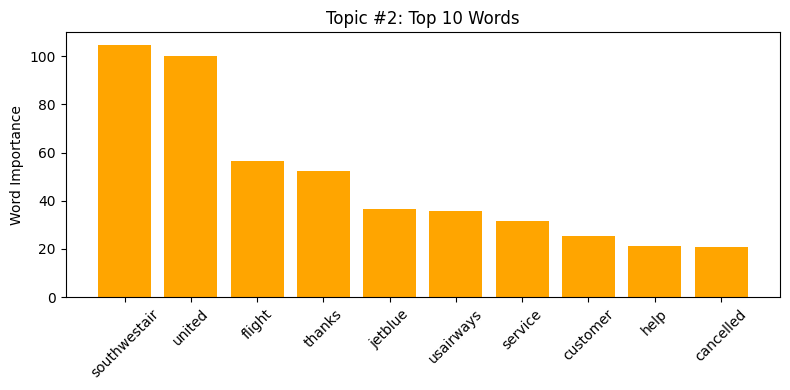

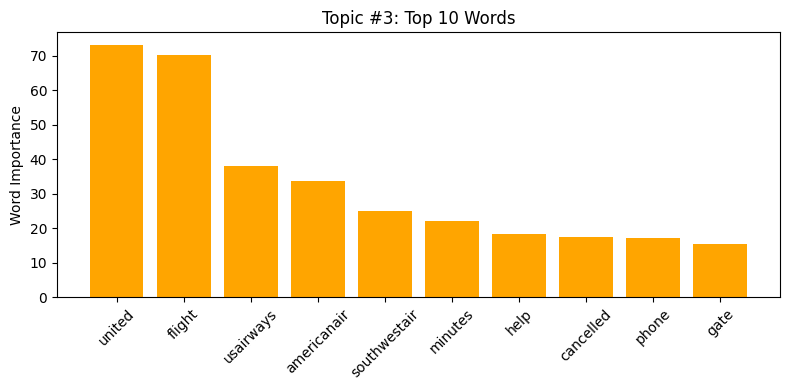

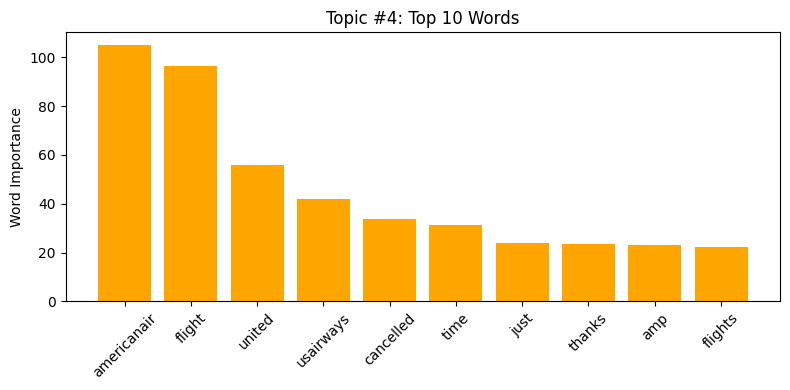

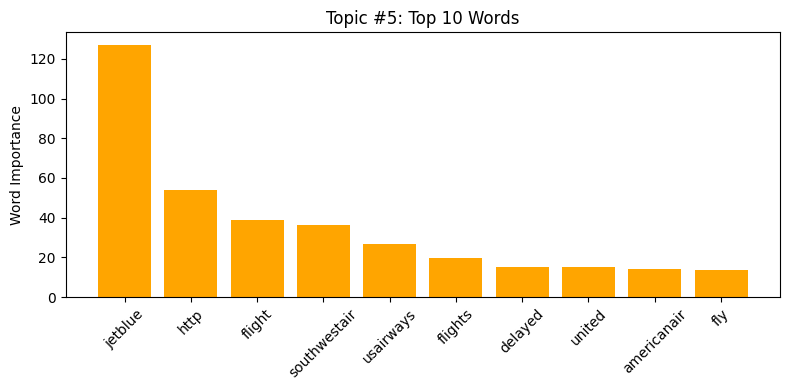

In [30]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

# Sample smaller subset for speed
texts = df['text'].dropna().sample(1000, random_state=42).tolist()

# Vectorize text
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(texts)
vocab = vectorizer.get_feature_names_out()

# Train LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)

# Plot top words per topic
def plot_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        plt.figure(figsize=(8, 4))
        plt.bar(top_features, weights, color='orange')
        plt.title(f"Topic #{topic_idx + 1}: Top {n_top_words} Words")
        plt.ylabel("Word Importance")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

plot_top_words(lda_model, vocab)


# Topic Distribution for Sample Tweets

<ipython-input-31-4188153548>:14: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


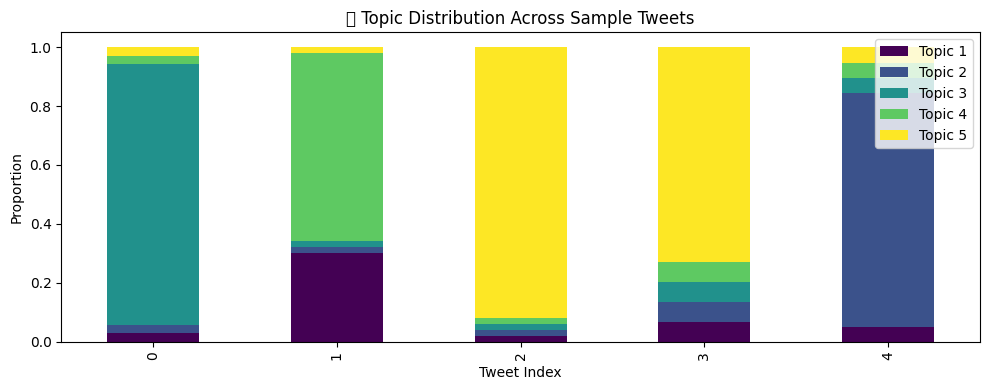

In [31]:
import pandas as pd
import seaborn as sns

# Get topic distribution for each document
doc_topic_dist = lda_model.transform(X)

# Plot topic distribution for first 5 tweets
df_topic_dist = pd.DataFrame(doc_topic_dist[:5], columns=[f"Topic {i+1}" for i in range(5)])
df_topic_dist.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 4))
plt.title("🔍 Topic Distribution Across Sample Tweets")
plt.ylabel("Proportion")
plt.xlabel("Tweet Index")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


# **Supervised Machine Learning**







In [ ]:
!pip install scikit-learn --quiet

**Prepare Data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Extract relevant columns
df_model = df[['text', 'airline_sentiment']].dropna()

# Define features and labels
X = df_model['text']
y = df_model['airline_sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Convert Text to TF-IDF Vectors**



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform training data, transform test data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


**Train Logistic Regression Classifier**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train model
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=200)

**Evaluate Model Performance**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict test labels
y_pred = model.predict(X_test_vec)

# Print accuracy and detailed report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7957650273224044

Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.93      0.87      1889
     neutral       0.65      0.49      0.56       580
    positive       0.79      0.63      0.70       459

    accuracy                           0.80      2928
   macro avg       0.76      0.68      0.71      2928
weighted avg       0.79      0.80      0.79      2928



## Confusion Matrix

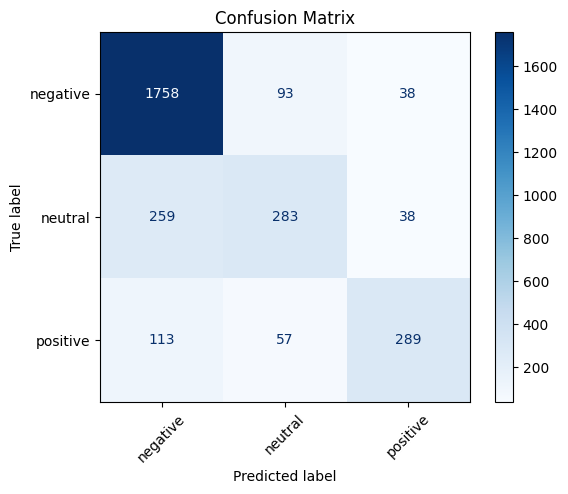

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Display as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


# Bar Chart of Class Distribution (Before Training)

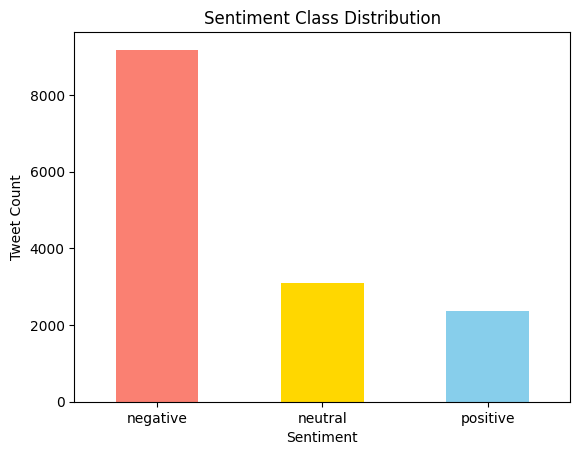

In [24]:
df_model['airline_sentiment'].value_counts().plot(
    kind='bar', color=['salmon', 'gold', 'skyblue'], title='Sentiment Class Distribution'
)
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.xticks(rotation=0)
plt.show()


# Bar Chart of F1-scores per Class (From Classification Report)

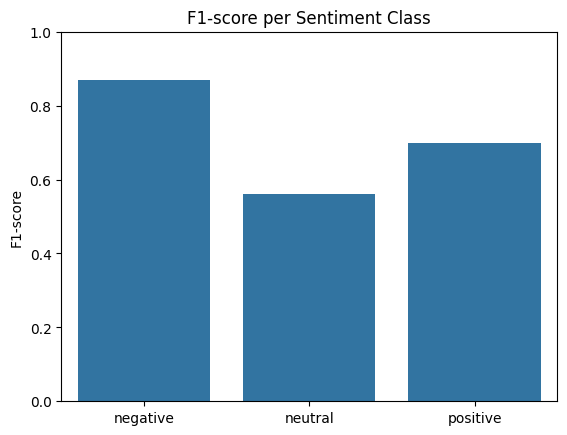

In [25]:
from sklearn.metrics import classification_report
import seaborn as sns

# Get f1-score from report
report = classification_report(y_test, y_pred, output_dict=True)
f1_scores = {label: round(metrics['f1-score'], 2) for label, metrics in report.items() if label in model.classes_}

# Plot
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()))
plt.title("F1-score per Sentiment Class")
plt.ylabel("F1-score")
plt.ylim(0, 1)
plt.show()
